In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('../calculated_features_19356_218115_284326303661025295376814747572002634939.csv')
print(df.shape)

(90002, 115)


In [105]:
print(list(df.columns))

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'next_score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_rounds_ff_play', 'average_plays_last_1_rounds_g_play', 'average_pl

In [106]:
auxiliary = ['scout_id','match_week','player_id', 'team_id', 'position_id']
y = df['next_score']

In [108]:
df = df.loc[df.next_score != 0] ## Droping players that didnt play
df_home = df.loc[df.home_team == 1]
df_away = df.loc[df.home_team == 0]
df_away.home_team = -1
df.fillna(0, inplace=True)
df.shape

/Users/henriquelopes/PycharmProjects/cartola_api/env_cartola/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(35848, 115)

In [110]:
df = pd.concat([df_home, df_away])
print(df)

       scout_id  match_week  player_id  team_id  delta_price  position_id  \
4         26362          25      41273      276        -0.11            6   
9         26371          37      83266      293        -1.14            4   
13        26378           8      37656      283         0.69            1   
15        26380          30      42145      283        -1.79            2   
17        26384          21      63003      265         0.66            4   
23        26392          18      37246      287        -0.32            6   
33        26409           5      86748      284         0.99            2   
35        26412          14      63194      294         0.00            2   
41        26421          33      83772      263         0.33            5   
52        26439           6      86748      284         0.23            2   
54        26442          32      42145      283         2.34            2   
59        26449          28      41273      276         0.35            6   

-1


## Studying variables

# Average points by posicion

[2.8941041598427777, 2.8695888657814748, 2.4454929348708787, 2.0606803964293245, 2.4117799352750811, 3.165364263803681]


(-1.1186064908563473,
 1.1142254715593778,
 -1.1125436578664627,
 1.1005973170412602)

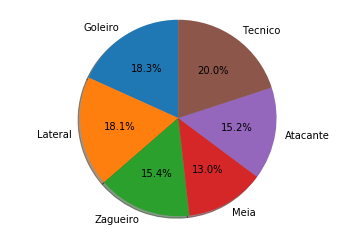

In [64]:
avg_points = list()
pos_list = ['Goleiro','Lateral', 'Zagueiro','Meia','Atacante', 'Tecnico']
for pos in sorted(df.position_id.unique()):
    avg_points.append(df.loc[df['position_id'] == pos].next_score.mean())

print(avg_points)
fig1, ax1 = plt.subplots()
ax1.pie(avg_points, labels=pos_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

# Most impactful stats by position

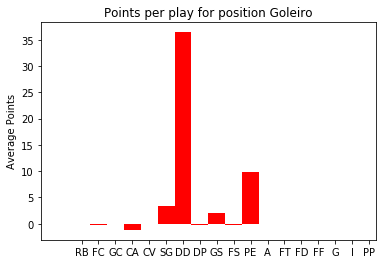

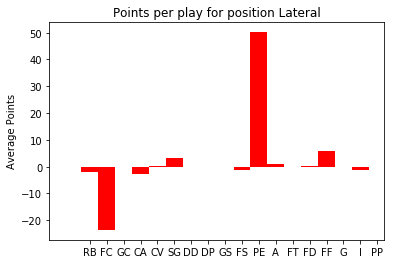

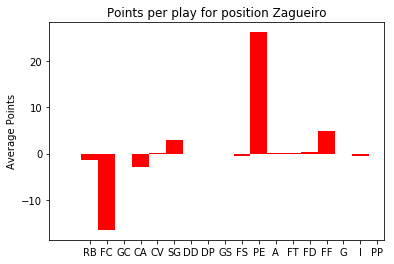

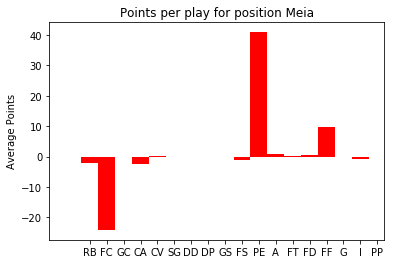

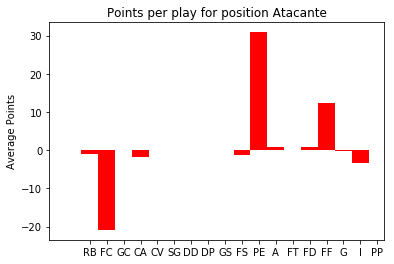

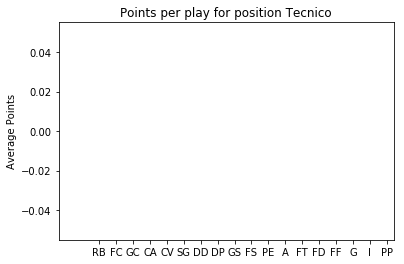

In [65]:
pontuacao = [1.7, -0.5, -6.0, -2.0, -5.0, 5.0, 3.00, 7.00, -2.0,
             0.5, -0.3, 5.0, 3.5, 1.0, 0.7, 8.0, -0.5, -3.5]
abreviacao = ['RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS',
              'FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I', 'PP']

descricao = ['Robadas de Bola', 'Faltas Cometidas', 'Gol Contra', 'Cartao Amarelo',
             'Cartao Vermelho', 'Jogo sem sofrer gol', 'Defesa Dificil', 'Defesa de Penalti',
             'Gol Sofrido', 'Falta Sofrida', 'Passe Errado', 'Assistencia',
             'Finalizacao na Trave', 'Finalizacao defendida', 'Finalizao pra Fora', 'Gol',
             'Impedimento', 'Penalti Perdido']
play_dict = {
    'RB': 1.7,
    'FC': -0.5,
    'GC': -6.0,
    'CA': -2.0,
    'CV': -5.0,
    'SG': 5.0,
    'DD': 3.0,
    'DP': 7.0,
    'GS': -2.0,
    'FS': 0.5,
    'PE': -0.3,
    'A': 5.0,
    'FT': 3.5,
    'FD': 1.0,
    'FF': 0.7,
    'G': 8.0,
    'I': -0.5,
    'PP': -3.5
}

description_dict = {
    'RB': 'Robadas de Bola',
    'FC': 'Faltas Cometidas',
    'GC': 'Gol Contra',
    'CA': 'Cartao Amarelo',
    'CV': 'Cartao Vermelho',
    'SG': 'Jogo sem sofrer gol',
    'DD': 'Defesa Dificil',
    'DP': 'Defesa de Penalti',
    'GS': 'Gol Sofrido',
    'FS': 'Falta Sofrida',
    'PE': 'Passe Errado',
    'A': 'Assistencia',
    'FT': 'Finalizacao na Trave',
    'FD': 'Finalizacao Defendida',
    'FF': 'Finalizacao pra Fora',
    'G': 'Gol',
    'I': 'Impedimento',
    'PP': 'Penalti Perdido'
}


for pos in sorted(df.position_id.unique()):
    play_list = [0]
    for play in abreviacao[1:len(abreviacao)]:
        play_list.append(play_dict[play] * df.loc[df['position_id'] == pos]['average_plays_last_1_rounds_' + play.lower() + '_play'].mean())
    
#     print(play_list)
    ind = np.arange(len(play_list))  # the x locations for the groups
    width = 1       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, play_list, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Average Points')
    ax.set_title('Points per play for position %s' % (pos_list[pos - 1]))
    ax.set_xticks(ind + width)
    ax.set_xticklabels(abreviacao)

#     plt.show()

# Team Analysis

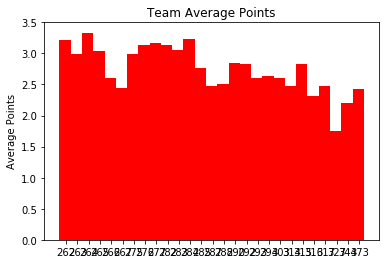

In [111]:
avg_points = list()
team_list = ['Flamengo','Botafogo', 'Corinthians','Santos','...']
team_list = sorted(df.team_id.unique())
for team in sorted(df.team_id.unique()):
    avg_points.append(df.loc[df.team_id == team].next_score.mean())
    
ind = np.arange(len(team_list))  # the x locations for the groups
width = 0.1    # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(ind, avg_points, color='r', width=1,align='center')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Points')
ax.set_title('Team Average Points')
ax.set_xticks(ind + width)
ax.set_xticklabels(team_list)

plt.show()

In [112]:
print("Average home points: ",df_home.next_score.mean())
print("Average away points: ",df_away.next_score.mean())

Average home points:  2.5507585034
Average away points:  3.11757414323


# Top Players per round

In [118]:
for year in (2014,2015,2016,2017):
    for rodada in sorted(df.match_week.unique()):
#         years = df.loc[df.year == year]
        years = df
        points = sorted(years.loc[years.match_week == rodada].next_score, reverse=True)[0:19]
        print(points)

[24.399999999999999, 22.800000000000001, 19.0, 18.5, 18.199999999999999, 17.899999999999999, 17.100000000000001, 17.0, 16.100000000000001, 15.9, 15.9, 15.199999999999999, 13.9, 13.9, 13.699999999999999, 13.699999999999999, 12.9, 12.5, 11.800000000000001]
[26.699999999999999, 19.699999999999999, 19.199999999999999, 19.0, 19.0, 17.5, 17.300000000000001, 17.0, 16.600000000000001, 16.399999999999999, 16.199999999999999, 15.9, 15.800000000000001, 15.300000000000001, 14.699999999999999, 14.5, 14.300000000000001, 14.199999999999999, 13.5]
[26.300000000000001, 25.0, 21.899999999999999, 21.100000000000001, 19.699999999999999, 19.199999999999999, 18.300000000000001, 17.199999999999999, 17.100000000000001, 16.300000000000001, 16.100000000000001, 15.800000000000001, 15.199999999999999, 15.0, 15.0, 14.4, 14.4, 14.1, 13.4]
[31.899999999999999, 22.699999999999999, 22.300000000000001, 19.100000000000001, 18.399999999999999, 16.199999999999999, 16.0, 15.9, 15.699999999999999, 15.699999999999999, 15.4, 

[21.0, 20.5, 19.399999999999999, 17.800000000000001, 17.100000000000001, 16.699999999999999, 16.399999999999999, 16.0, 16.0, 15.699999999999999, 15.300000000000001, 14.699999999999999, 14.5, 14.4, 13.6, 13.4, 13.4, 13.300000000000001, 13.300000000000001]
[18.300000000000001, 17.600000000000001, 17.399999999999999, 17.100000000000001, 16.600000000000001, 16.100000000000001, 15.5, 14.800000000000001, 14.5, 14.5, 14.1, 14.1, 14.1, 14.0, 13.800000000000001, 13.800000000000001, 13.699999999999999, 13.699999999999999, 13.6]
[20.100000000000001, 18.0, 17.699999999999999, 16.300000000000001, 16.100000000000001, 15.9, 15.9, 15.6, 14.5, 14.4, 14.199999999999999, 14.0, 14.0, 13.699999999999999, 13.6, 13.5, 13.5, 13.5, 13.4]
[23.0, 22.0, 20.600000000000001, 18.800000000000001, 18.100000000000001, 17.800000000000001, 17.399999999999999, 17.399999999999999, 17.0, 16.699999999999999, 16.600000000000001, 16.399999999999999, 16.100000000000001, 16.0, 16.0, 15.9, 15.9, 15.699999999999999, 15.5]
[22.6999

[24.100000000000001, 23.699999999999999, 20.5, 18.600000000000001, 16.800000000000001, 16.600000000000001, 16.399999999999999, 16.399999999999999, 15.800000000000001, 15.300000000000001, 15.199999999999999, 15.0, 14.9, 14.9, 14.800000000000001, 14.699999999999999, 14.300000000000001, 13.699999999999999, 13.699999999999999]
[27.100000000000001, 20.199999999999999, 19.399999999999999, 19.100000000000001, 18.300000000000001, 18.0, 17.600000000000001, 17.0, 16.5, 14.800000000000001, 14.800000000000001, 14.699999999999999, 14.300000000000001, 14.1, 14.1, 14.0, 13.9, 13.9, 13.699999999999999]
[23.100000000000001, 22.300000000000001, 18.100000000000001, 18.0, 17.699999999999999, 17.5, 16.899999999999999, 16.5, 16.0, 15.5, 15.4, 14.5, 14.4, 14.300000000000001, 14.300000000000001, 14.0, 13.800000000000001, 13.699999999999999, 13.5]
[20.699999999999999, 18.100000000000001, 17.0, 16.399999999999999, 16.100000000000001, 15.800000000000001, 15.6, 15.0, 14.699999999999999, 14.5, 14.4, 14.19999999999